# 平均と分散だけから元のデータを推定する 

## 概要

統計解析を行おうとする時, 生データが全て手元にある場合はいいのだが, 実際はしばしば平均や分散などの要約統計量しか手に入らないことがある. 
そのような状況下において, 例えば平均と分散のみが既知の場合にダミーデータを生成し, 分散分析やt検定を可能にするための手法が考案されてきた. 
(Larson, David A. “Analysis of Variance With Just Summary Statistics As Input”, The American Statistician, 46, 151-152 (1992)など. )

ただし, Larson(1992)の方法は簡便だが, 生成された$n$個のサンプルの内$n-1$個は同じ値になってしまう. また, ある平均と分散をもつ値の組は一般に無数に考えられるが, Larson(1992)の方法はそのうち一つの組を取得するに過ぎない. また, 観測量の値の上限や下限の存在を考慮することは出来ない.

要約統計量から人工的にデータを再現した上で, 一般の統計解析を可能にするため, またその結果の妥当性を検証できるようにするため, 
ここでは, 値域の制約のもと, ある平均・分散をもつ全ての値の組の集合から, 等確率でサンプリングを行う手法を検討する. 


## 理論

$n$個のサンプルの最初の2つの拘束条件は,

平均

$$
    \sum x_i = n\mu
$$

と,不偏分散

$$
    \sum \left(x_i - \mu\right)^2 = (n-1)\sigma^2
$$

にである.ここで平均とサンプルの差

$$
    y_i = x_i - \mu
$$

を用いて変数変換すると, 

$$
    \sum y_i = 0
$$

$$
    \sum y_i^2 = (n-1)\sigma^2
$$

と変形できる. これは$n$次元空間における超平面と, 半径$\sigma\sqrt{n-1}$の超球の交わる点の集合であり, $n-1$ 次元の超球面を成す.

### 4サンプルの時

特に$n=4$のとき， 上記の２式から$y_4$を消去すると変数間の条件は，

$$
    (y_1+y_2)^2 + (y_2+y_3)^2 + (y_3+y_1)^2 = 3\sigma^2 
$$

となる． ここで変数変換を次のように行う

$$
    X = y_1+y_2
$$

$$
    Y = y_2+y_3
$$

$$
    Z = y_3+y_1
$$

これらの3変数は循環対称であり, また, 1つの変数を固定して他の2つの変数を交換可能である.

これらの変数の導入により， 条件を満たす$(X, Y, Z)$,の組は

$$
    X^2 + Y^2 + Z^2 = 3\sigma^2
$$

という半径$\sqrt{3}\sigma$の球面上に存在するといえる. したがって, 例えばこの球面上からランダムに点を選び, 再び変数変換

$$
    y_1 = \frac{X-Y+Z}{2}
$$

$$
    y_2 = \frac{X+Y-Z}{2}
$$

$$
    y_3 = \frac{-X+Y+Z}{2}
$$

$$
    y_4 = - \frac{X+Y+Z}{2}
$$

を行い, 次に$x_i = y_i + \mu$ と変換を行うことで実データの組を得ることができる.

### 値域の制約と超球面上の点の部分集合について

上で示した超球面は, ある平均と分散をもつ全ての4つの変数の組に対応している. 変数の値域に制約が加わる場合には, 条件を満たす点の集合は超球面の一部のみに対応する可能性がある.
例えば$x_i >0$という条件がある時, 

$$
    x_4 - \mu = y_4 = - \frac{X+Y+Z}{2} > -\mu
$$

ゆえに, 

$$
    X + Y + Z < 2\mu
$$

この条件を満たす$(X, Y, Z)$は, 3点 $(2\mu, 0,0), (0,2\mu,0), (0,0,2\mu)$を通る平面より原点側に存在する. 
平均$\mu$と値域の上限下限の差に対して分散$\sigma^2$が相対的に大きくなるほど, 平面と超球の中心との距離は小さくなり, 条件を満たす領域は縮小する.
同様に, 他の3変数の条件からも, データの正負の境界を示す3つの平面が得られ, 結局超球面のうち, 4つの平面より原点側にある部分だけがサンプリングすべき点であることになる.

また, $0<=x_i<=1$のように, 変数の上限を与えると, 変数の上限を左右する平面が新たに4つ定義でき, やはりそれらの面より原点側にある超球面上の点がサンプリングすべき集合となる.


## 一般の値域の制約のもとでのサンプリング条件

4サンプルの平均と分散で決まる球面のうち, サンプルの値域を満たす部分は, 次にように求められる.
まず, サンプルの下限と上限の条件はそれぞれ, X-Y-Z空間上の正四面体によって表すことができる.

![](./image/tetrahedrons.png)
図 Y軸方向から2つの正四面体を見た様子.

球の半径を$R$とおく.
サンプルの平均, 下限値, 上限値をそれぞれ$\mu, x_{min}, x_{max}$とし, 次の変数$m, l$を導入する. すなわち,

$$
    l = 2 \times (\mu - x_{min})
$$

$$
    u = 2 \times (x_{max}-\mu)
$$

これらを用いると, 変数の下限と上限を表す正四面体$T_{L}, T_{U}$の頂点の座標はそれぞれ, 

$$
    T_L(X,Y,Z) = (l,-l,l), (-l,l,l), (-l,-l,-l), (l,l,-l)
$$

$$
    T_U(X,Y,Z) = (u,u,u), (-u,-u,u), (u,-u,-u), (-u,u,-u)
$$

となる. 球面のうち, これら2つの正四面体の内部にある領域が, 条件を満たす.

2つの四面体は合わせて立方晶系に属する.
すなわち, $X,Y,Z$軸を2回対称軸とし, 原点に対して点対称である. また, 4本の3回対称軸を持ち, それらは球面の四面体による断面である小円の中心に一致する.

$T_L, T_U$との断面である小円の半径を$r_l, r_u$とするとそれぞれ, 

$$
    r_l = \sqrt{R^2 - \frac{l^2}{3}} 
$$

$$
    r_u = \sqrt{R^2 - \frac{u^2}{3}}
$$

と表される. 
球面と2つの正四面体の幾何学的関係により, 主な場合分けが次のようになされる. 

1. $T_L$, $T_U$の両方の断面が現れる
  1. どちらの断面も赤道園と交差しない
  1. 一方の断面が赤道面と交差する
    1. 2種類の断面が交差しない
    1. 2種類の断面が交差する
  1. 一方の断面が互いに交差する
    1. 2種類の断面が交差しない
    1. 2種類の断面が交差する
2. $T_L$, $T_U$の一方のみ断面のみが現れる
  1. 断面が赤道面と交差しない
  1. 断面が赤道面と交差する
  1. 断面が互いに交差する
3. 断面が現れない

![](./image/intersects.png)
図 2つの正四面体によって球面が切られるときの断面の小円の関係

以下では, 四面体の内部に存在する球面上の点を円筒座標$(r,\theta,Z)$で取得するためのPython(v. 3)コードを示す.



In [4]:
# 一様分布から値を取り出す関数. 値域が2つの領域に分かれている場合にも対応する.
def randomFrom(range1,range2 = []):
    if (len(range2) > 2):
        f = (range1[1]-range1[0] + range2[1]-range2[0])/(range1[1]-range1[0])
        r = rand()
        if (r > f):
            return (range2[1]-range2[0])*(r-f)/(1-f) + range2[0]
        else:
            return (range1[1]-range1[0])*r/f + range1[0]
        
    else:
        return (range1[1]-range1[0]) * rand() + range1[0]

# 半径1の球面上の座標を取得する. (X,Y,Z)に対応する.
def onSuperSphere(mu,sigma,minmax):
    R = np.sqrt(3)*sigma
    u = 2 * (minmax[1] - mu) # 変数の上限による
    l = 2 * (mu - minmax[0]) # 変数の下限による
    
    # 四面体による断面の小円の半径の二乗
    dl = R * R - l * l /3
    du = R * R - u * u /3
    
    if ((np.sqrt(3) * l < R) | (np.sqrt(3) * u < R) ):
        # 断面の小円の半径が球の半径と一致するとき球面はなくなる
        xyz = noSphere()
    
    elif ((dl >= 0) & (du >=0)):
        # 下限と上限の両方に対応する小円が球面に現れるとき
        xyz = cutByOctahedron(l,u,R)
        
    elif (dl >= 0):
        # 下限の小円のみ現れるとき
        xyz = cutByLowerTetrahedron(l,u,R)
    elif (du >= 0):
        # 上限の小円のみ現れるとき
        xyz = cutByUpperTetrahedron(l,u,R)
    else:
        # 四面体による断面が現れないとき
        xyz = completeSphere(l,u,R)
    
    return xyz

# 球面が2つの正四面体で切られる場合
def cutByOctahedron(m,l,R):
    pi = np.pi
    
    # 切り口の小円の半径
    rm = np.sqrt(R*R - m*m/3)
    rl = np.sqrt(R*R - l*l/3)
    
    # 小円のZ座標の上限下限
    zm_top = (m + np.sqrt(6) * rm)/3
    zm_bottom = (m - np.sqrt(6) * rm)/3
    
    zl_top = (l + np.sqrt(6) * rl)/3
    zl_bottom = (l - np.sqrt(6) * rl)/3
    
    # 下限と上限の小円の半径の内どちらが大きいかで条件が異なる
    if (rm >= rl):
        # 最小値の小円のほうが大きいとき
        
        if (np.sqrt(2) * R <= m ):
            # 小円が半球内に収まるとき
            z_max = R
            z_min = 0
            z = randomFrom([z_min,z_max])
            r = np.sqrt(R*R - z*z)
            
            bm = np.sqrt(2)/2 * (m-z)
            bl = np.sqrt(2)/2 * (l-z)
            
            if (zm_top <= z):
                theta = randomFrom(
                    [
                        pi/4,
                        pi*3/4
                    ])
                
            elif (zl_top <= z ):
                theta = randomFrom(
                    [
                        pi/4 + np.arccos(bm/r),
                        pi*3/4
                    ])
                
            elif (zl_bottom <= z):
                theta = randomFrom(
                    [
                        np.arccos(bm/r)+pi/4,
                        pi*3/4 - np.arccos(bl/r)
                    ])
                
            elif (zm_bottom <= z):
                theta = randomFrom(
                [
                    pi/4 + np.arccos(bm/r),
                    pi*3/4
                ])
                
            else:
                theta = randomFrom([pi/4,pi*3/4])
            
        else: 
            # 小円が赤道を切るとき
            
            if(R <= m):
                # 小円mどうしは交差しないとき
                z_max = R
                z_min = 0
            else:
                # 同じタイプの小円が交差するとき
                z_max = m
                z_min = np.sqrt((R*R-m*m)/2) # 小円の交差点
            
            # 最大値と最小値に対応する2種類の小円が交差するかどうか
            d_intersect_double_circles = 8 * R*R + 2 * m * l - 3 * (m*m + l*l)
            
            if (d_intersect_double_circles > 0):
                # 2タイプの小円が交差するとき
                z_intersect_top =    (m+l + np.sqrt(d_intersect_double_circles))/4
                z_intersect_bottom = (m+l - np.sqrt(d_intersect_double_circles))/4

                # もし小円mの交点より上に小円mとlの交点がある場合は解なし
                if (z_max < z_intersect_top):
                    return {
                        "x":np.nan,
                        "y":np.nan,
                        "z":np.nan
                    }
                
                
                z = randomFrom(
                    [z_min,z_intersect_bottom],
                    [z_intersect_top,z_max]
                )
                r = np.sqrt(R*R - z*z)
            
                bm = np.sqrt(2)/2 * (m-z)
                bm_inv = np.sqrt(2)/2 * (m+z)
                bl = np.sqrt(2)/2 * (l-z)
                
                
                
                # 2タイプの小円が交差する
                if (z >= zm_top):
                    theta = randomFrom(
                        [
                            pi/4,
                            pi*3/4
                        ]
                        
                    )
                elif (z >= zl_top):
                    theta = randomFrom(
                        [
                            pi/4 + np.arccos(bm/r),
                            pi*3/4
                        ]
                    )
                
                elif (z >= z_intersect_top):
                    theta = randomFrom(
                        [
                            np.arccos(bm/r)+pi/4,
                            pi*3/4 - np.arccos(bl/r)
                        ]
                    )

                elif (z >= (l-m)/2):
                    # 小円lと, 南半球の小円mの交点
                    theta = randomFrom(
                        [
                            np.arccos(bm/r)+pi/4,
                            pi*3/4 - np.arccos(bl/r)
                        ]
                    )

                else:
                    # 南半球の小円mとの間
                    theta = randomFrom(
                        [
                            np.arccos(bm/r)+pi/4,
                            pi*3/4 - np.arccos(bm_inv/r)
                        ]
                    )
                
            else:
                # 2タイプの小円は交差しない
                z = randomFrom(
                    [z_min,z_max],
                )
                r = np.sqrt(R*R - z*z)
            
                bm = np.sqrt(2)/2 * (m-z)
                bm_inv = np.sqrt(2)/2 * (m+z)
                bl = np.sqrt(2)/2 * (l-z)
                
                if (zm_top < z):
                    theta = randomFrom(
                        [
                            pi/4,
                            pi*3/4
                    ])
                elif (zl_top < z):
                    theta = randomFrom(
                        [
                            pi/4 + np.arccos(bm/r),
                            pi*3/4
                    ])
                elif (zl_bottom < z):
                    theta = randomFrom(
                        [
                            np.arccos(bm/r)+pi/4,
                            pi*3/4 - np.arccos(bl/r)
                        ]
                    )
                elif (-zm_bottom < z):
                    theta = randomFrom(
                        [
                            np.arccos(bm/r)+pi/4,
                            pi*3/4
                        ]
                    )
                else:
                    theta = randomFrom(
                        [
                            np.arccos(bm/r)+pi/4,
                            pi*3/4 - np.arccos(bm_inv/r)
                        ]
                    )
            
    
    else:
        # 小円lのほうが大きいとき
        
        if (np.sqrt(2) * R <= l ):
            # 小円が半球内に収まるとき
            z_max = R
            z_min = 0
            z = randomFrom([z_min,z_max])
            r = np.sqrt(R*R - z*z)
            
            bm = np.sqrt(2)/2 * (m-z)
            bl = np.sqrt(2)/2 * (l-z)
            
 
            
            if (zl_top <= z):
                theta = randomFrom(
                    [
                        pi/4,
                        pi*3/4
                    ])
                
            elif (zm_top <= z ):
                theta = randomFrom(
                    [
                        pi/4 ,
                        pi*3/4 - np.arccos(bl/r)
                    ])
                
            elif (zm_bottom <= z):
                theta = randomFrom(
                    [
                        np.arccos(bm/r)+pi/4,
                        pi*3/4 - np.arccos(bl/r)
                    ])
                
            elif (zl_bottom <= z):
                theta = randomFrom(
                [
                    pi/4 ,
                    pi*3/4 - np.arccos(bm/r)
                ])
                
            else:
                theta = randomFrom([pi/4,pi*3/4])
            
        else: 
            # 小円が赤道を切るとき
            
            if(R <= l):
                # 小円mどうしは交差しないとき
                z_max = R
                z_min = 0
            else:
                # 同じタイプの小円が交差するとき
                z_max = l
                z_min = np.sqrt((R*R-l*l)/2) # 小円の交差点
            
            
            
            # 最大値と最小値に対応する2種類の小円が交差するかどうか
            d_intersect_double_circles = 8 * R*R + 2 * m * l - 3 * (m*m + l*l)

            if (d_intersect_double_circles > 0):
                # 2タイプの小円が交差するとき
                z_intersect_top = (m+l + np.sqrt(d_intersect_double_circles))/4
                z_intersect_bottom = (m+l - np.sqrt(d_intersect_double_circles))/4

                # もし小円mの交点より上に小円mとlの交点がある場合は解なし
                if (z_max < z_intersect_top):
                    return {
                        "x":np.nan,
                        "y":np.nan,
                        "z":np.nan
                    }
                
                
                z = randomFrom(
                    [z_min,z_intersect_bottom],
                    [z_intersect_top,z_max]
                )
                r = np.sqrt(R*R - z*z)
            
                bm = np.sqrt(2)/2 * (m-z)
                bl_inv = np.sqrt(2)/2 * (l+z)
                bl = np.sqrt(2)/2 * (l-z)
                
                
                
                # 2タイプの小円が交差する
                if (z >= zl_top):
                    theta = randomFrom(
                        [
                            pi/4,
                            pi*3/4
                    ])
                elif (z >= zm_top):
                    theta = randomFrom(
                        [
                            pi/4,
                            pi*3/4- np.arccos(bl/r)
                    ])
                
                elif (z >= z_intersect_top):
                    theta = randomFrom(
                        [
                            np.arccos(bm/r)+pi/4,
                            pi*3/4 - np.arccos(bl/r)
                        ]
                    )

                elif (z >= (m-l)/2):
                    # 小円lと, 南半球の小円mの交点
                    theta = randomFrom(
                        [
                            np.arccos(bm/r)+pi/4,
                            pi*3/4 - np.arccos(bl/r)
                        ]
                    )

                else:
                    # 南半球の小円mとの間
                    theta = randomFrom(
                        [
                            np.arccos(bl_inv/r)+pi/4,
                            pi*3/4 - np.arccos(bl/r)
                        ]
                    )
                
            else:
                # 2タイプの小円は交差しない
                z = randomFrom(
                    [z_min,z_max],
                )
                r = np.sqrt(R*R - z*z)
            
                bm = np.sqrt(2)/2 * (m-z)
                bl_inv = np.sqrt(2)/2 * (l+z)
                bl = np.sqrt(2)/2 * (l-z)
                
                if (zl_top < z):
                    theta = randomFrom(
                        [
                            pi/4,
                            pi*3/4
                    ])
                elif (zm_top < z):
                    theta = randomFrom(
                        [
                            pi/4 ,
                            pi*3/4-np.arccos(bl/r)
                    ])
                elif (zm_bottom < z):
                    theta = randomFrom(
                        [
                            np.arccos(bm/r)+pi/4,
                            pi*3/4 - np.arccos(bl/r)
                        ]
                    )
                elif (-zl_bottom < z):
                    theta = randomFrom(
                        [
                            pi/4,
                            pi*3/4 - np.arccos(bl/r)
                        ]
                    )
                else:
                    theta = randomFrom(
                        [
                            np.arccos(bl_inv/r)+pi/4,
                            pi*3/4 - np.arccos(bl/r)
                        ]
                    )
    
    rotate = rand()
    if (rotate <= 0.25):
        theta = pi/2 - theta

    elif (rotate <= 0.5):
        theta = pi*3/2 - theta
    elif (rotate <= 0.75):
        theta = pi + theta
    
    if (rand() < 0.5):
        return {
            "x" : r * np.cos(theta),
            "y" : r * np.sin(theta),
            "z" : z
        }
    else:
        return {
            "x" : -r * np.cos(theta-pi/2),
            "y" : -r * np.sin(theta-pi/2),
            "z" : -z
        }

    
def cutByLowerTetrahedron(m,l,R):
    pi = np.pi
    
    # 切り口の小円の半径
    rm = np.sqrt(R*R - m*m/3)
    
    # 小円のZ座標の上限下限
    zm_top = (m + np.sqrt(6) * rm)/3
    zm_bottom = (m - np.sqrt(6) * rm)/3

    
    if (np.sqrt(2) * R <= m ):
        # 小円が半球内に収まるとき
        z_max = R
        z_min = 0
        z = randomFrom([z_min,z_max])
        r = np.sqrt(R*R - z*z)
            
        bm = np.sqrt(2)/2 * (m-z)

        if (zm_top <= z):
            theta = randomFrom(
                [
                    pi/4,
                    pi*3/4
                ])
                
            
        elif (zm_bottom <= z):
            theta = randomFrom([
                 pi/4 + np.arccos(bm/r),
                 pi*3/4
            ])
                
        else:
            theta = randomFrom([pi/4,pi*3/4])
            
    else: 
        # 小円が赤道を切るとき
            
        if(R <= m):
            # 小円mどうしは交差しないとき
            z_max = R
            z_min = 0
        else:
            # 同じタイプの小円が交差するとき
            z_max = m
            z_min = np.sqrt((R*R-m*m)/2) # 小円の交差点
            
        # 2タイプの小円は交差しない
        z = randomFrom(
            [z_min,z_max],
        )
        r = np.sqrt(R*R - z*z)
            
        bm = np.sqrt(2)/2 * (m-z)
        bm_inv = np.sqrt(2)/2 * (m+z)

                
        if (zm_top < z):
            theta = randomFrom(
                [
                    pi/4,
                    pi*3/4
                ])

        elif (-zm_bottom < z):
            theta = randomFrom(
                [
                    pi/4 + np.arccos(bm/r),
                    pi*3/4
                ]
            )
        else:
            theta = randomFrom(
                [
                    np.arccos(bm/r)+pi/4,
                    pi*3/4 - np.arccos(bm_inv/r)
                ]
            )
    
    rotate = rand()
    if (rotate <= 0.25):
        theta = pi/2 - theta

    elif (rotate <= 0.5):
        theta = pi*3/2 - theta
    elif (rotate <= 0.75):
        theta = pi + theta
    
    if (rand() < 0.5):
        return {
            "x" : r * np.cos(theta),
            "y" : r * np.sin(theta),
            "z" : z
        }
    else:
        return {
            "x" : -r * np.cos(theta-pi/2),
            "y" : -r * np.sin(theta-pi/2),
            "z" : -z
        }
    
def cutByUpperTetrahedron(m,l,R):
    pi = np.pi
    
    # 切り口の小円の半径
    rl = np.sqrt(R*R - l*l/3)
    
    # 小円のZ座標の上限下限
    zl_top = (l + np.sqrt(6) * rl)/3
    zl_bottom = (l - np.sqrt(6) * rl)/3

    
    if (np.sqrt(2) * R <= l ):
        # 小円が半球内に収まるとき
        z_max = R
        z_min = 0
        z = randomFrom([z_min,z_max])
        r = np.sqrt(R*R - z*z)
            
        bl = np.sqrt(2)/2 * (l-z)

            
 
            
        if (zl_top <= z):
            theta = randomFrom(
                [
                    pi/4,
                    pi*3/4
                ])
                
            
        elif (zl_bottom <= z):
            theta = randomFrom([
                 pi/4 ,
                 pi*3/4 - np.arccos(bl/r)
            ])
                
        else:
            theta = randomFrom([pi/4,pi*3/4])
            
    else: 
        # 小円が赤道を切るとき
            
        if(R <= l):
            # 小円mどうしは交差しないとき
            z_max = R
            z_min = 0
        else:
            # 同じタイプの小円が交差するとき
            z_max = l
            z_min = np.sqrt((R*R-l*l)/2) # 小円の交差点
            
        # 2タイプの小円は交差しない
        z = randomFrom(
            [z_min,z_max],
        )
        r = np.sqrt(R*R - z*z)
            
        bl = np.sqrt(2)/2 * (l-z)
        bl_inv = np.sqrt(2)/2 * (l+z)

                
        if (zl_top < z):
            theta = randomFrom(
                [
                    pi/4,
                    pi*3/4
                ])

        elif (-zl_bottom < z):
            theta = randomFrom(
                [
                    pi/4,
                    pi*3/4 - np.arccos(bl/r),
                ]
            )
        else:
            theta = randomFrom(
                [
                    np.arccos(bl_inv/r)+pi/4,
                    pi*3/4 - np.arccos(bl/r)
                ]
            )
    
    rotate = rand()
    if (rotate <= 0.25):
        theta = pi/2 - theta

    elif (rotate <= 0.5):
        theta = pi*3/2 - theta
    elif (rotate <= 0.75):
        theta = pi + theta
    
    if (rand() < 0.5):
        return {
            "x" : r * np.cos(theta),
            "y" : r * np.sin(theta),
            "z" : z
        }
    else:
        return {
            "x" : -r * np.cos(theta-pi/2),
            "y" : -r * np.sin(theta-pi/2),
            "z" : -z
        }

    
def completeSphere(m,l,R):
    pi = np.pi
    z_max = R
    z_min = 0
    z = randomFrom([z_min,z_max])
    r = np.sqrt(R*R - z*z)
    
    theta = randomFrom(
                [
                    pi/4,
                    pi*3/4
                ])
    
    rotate = rand()
    if (rotate <= 0.25):
        theta = pi/2 - theta

    elif (rotate <= 0.5):
        theta = pi*3/2 - theta
    elif (rotate <= 0.75):
        theta = pi + theta
    
    if (rand() < 0.5):
        return {
            "x" : r * np.cos(theta),
            "y" : r * np.sin(theta),
            "z" : z
        }
    else:
        return {
            "x" : -r * np.cos(theta-pi/2),
            "y" : -r * np.sin(theta-pi/2),
            "z" : -z
        }

def noSphere():
    return {
        "x" : np.nan,
        "y" : np.nan,
        "z" : np.nan
    }

In [62]:
# 条件を満たす球面上の点をプロットする
def plotPresiceSphere(n,mu,sigma,minmax):
    
    x = np.ndarray(n)
    y = np.ndarray(n)
    z = np.ndarray(n)

    for i in range(0,n):
        xyz = onSuperSphere(mu,sigma,minmax)
        
        x[i] = xyz["x"]
        y[i] = xyz["y"]
        z[i] = xyz["z"]
    
    r = sigma * np.sqrt(3)
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x,y,z,c=z,cmap=cm.coolwarm)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim([-r,r])
    ax.set_ylim([-r,r])
    ax.set_zlim([-r,r])
    
# 再現データの組をプロットする
# 3つの変数を3次元空間上の座標で, 4つ目の変数の値を色に対応付けて表示
def plotReal(n,mu,sigma,minmax):
    x = np.ndarray(n)
    y = np.ndarray(n)
    z = np.ndarray(n)
    w = np.ndarray(n)


    for i in range(0,n):
        xyz = onSuperSphere(mu,sigma,minmax)
        
        vector = realValue(xyz,mu)
        
        x[i] = vector[0]
        y[i] = vector[1]
        z[i] = vector[2]
        w[i] = vector[3]
    
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x,y,z,c=w,cmap=cm.coolwarm)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    ax.set_xlim([minmax[0],minmax[1]])
    ax.set_ylim([minmax[0],minmax[1]])
    ax.set_zlim([minmax[0],minmax[1]])
    
# 球面上の座標から再現データを生成する
def realValue(xyz, mu):
    vector = [
            (xyz["x"]-xyz["y"]+xyz["z"])*0.5+mu,
            (xyz["x"]+xyz["y"]-xyz["z"])*0.5+mu,
            (-xyz["x"]+xyz["y"]+xyz["z"])*0.5+mu,
            0-(xyz["x"]+xyz["y"]+xyz["z"])*0.5+mu
        ]
    
    return vector

# 超球面からのランダムな4サンプルの生成を厳密に行う
def resample(mean,sd,x_range):
    xyz = onSuperSphere(mean,sd,x_range)
    vector = realValue(xyz,mean)
    return vector

In [19]:
# Larson, David A. “Analysis of Variance With Just Summary Statistics As Input”, The American Statistician, 46, 151-152 (1992).
def stat2data(n, mean, sd):
    dat = []
    yi = mean + sd/np.sqrt(n)
    for i in range(n-1):
        dat.append(yi)
    dat.append(n * mean - (n-1)*yi)
    return dat

In [13]:
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

This method
[ 0.13116519  0.21331351  0.67459791  0.98092339]
[ 0.01163884  0.44238863  0.56186864  0.98410389]
[ 0.04396104  0.31659713  0.68943482  0.95000701]
[ 0.00747186  0.50125135  0.5040416   0.98723519]
[ 0.01053473  0.37488909  0.67327489  0.94130129]
[ 0.11611787  0.24708599  0.63685695  0.99993919]
[ 0.06551251  0.26269677  0.76786445  0.90392628]
[ 0.02132975  0.43066795  0.5550096   0.9929927 ]
[ 0.14469906  0.20985579  0.64768278  0.99776237]
[ 0.09794568  0.21655012  0.80369771  0.88180649]
Larson, 1992
[0.69999999999999996, 0.69999999999999996, 0.69999999999999996, -0.099999999999999645]


<IPython.core.display.Javascript object>


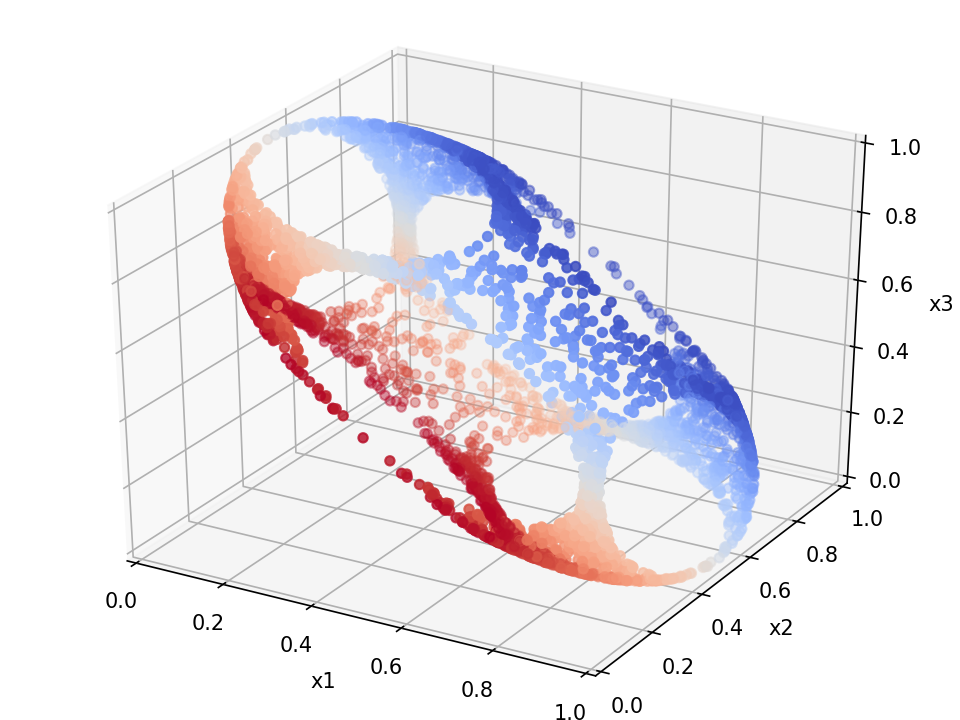

In [66]:
# 観測量が0～1であるべき場合でも, Larson (1992)ではそれを考慮できず負の値が得られることがある.
# 本手法は観測量の値域を考慮し, かつ可能な全ての値の組の集合からランダムにサンプリング可能.

mean = 0.5
sd = 0.4
limit = [0,1]

print("This method")
for i in range(10):
    print(np.sort(resample(mean, sd, limit)))
    
print("Larson, 1992")
print(stat2data(4, mean, sd))

plotReal(5000,mean,sd,limit)

<IPython.core.display.Javascript object>


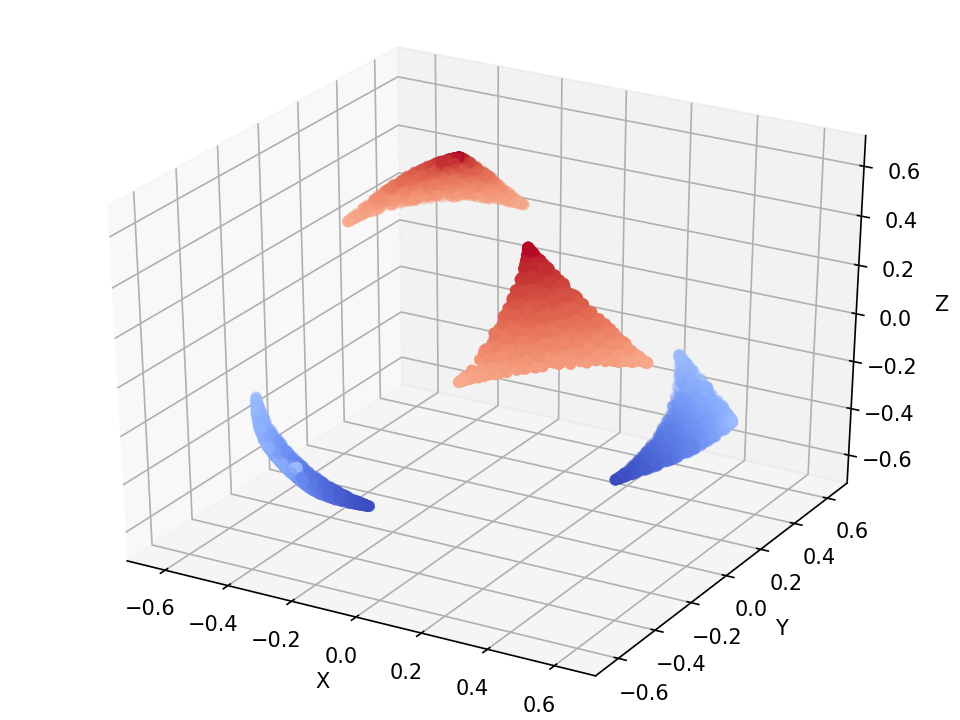

In [50]:
plotPresiceSphere(5000,0.3,0.4,[0,1])

<IPython.core.display.Javascript object>


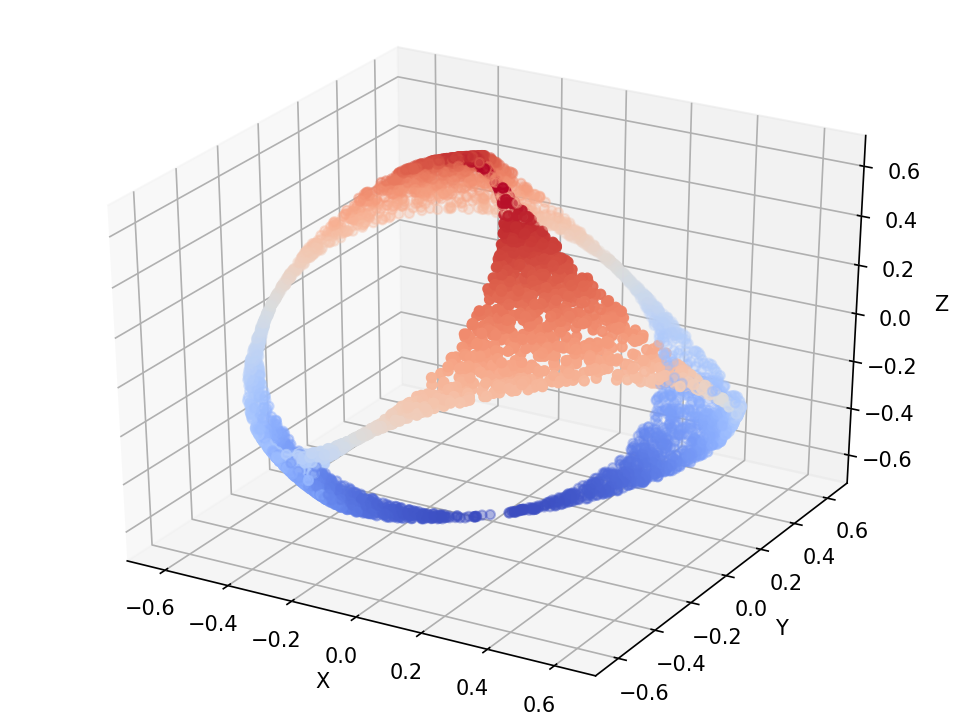

In [51]:
plotPresiceSphere(5000,0.35,0.4,[0,1])

<IPython.core.display.Javascript object>


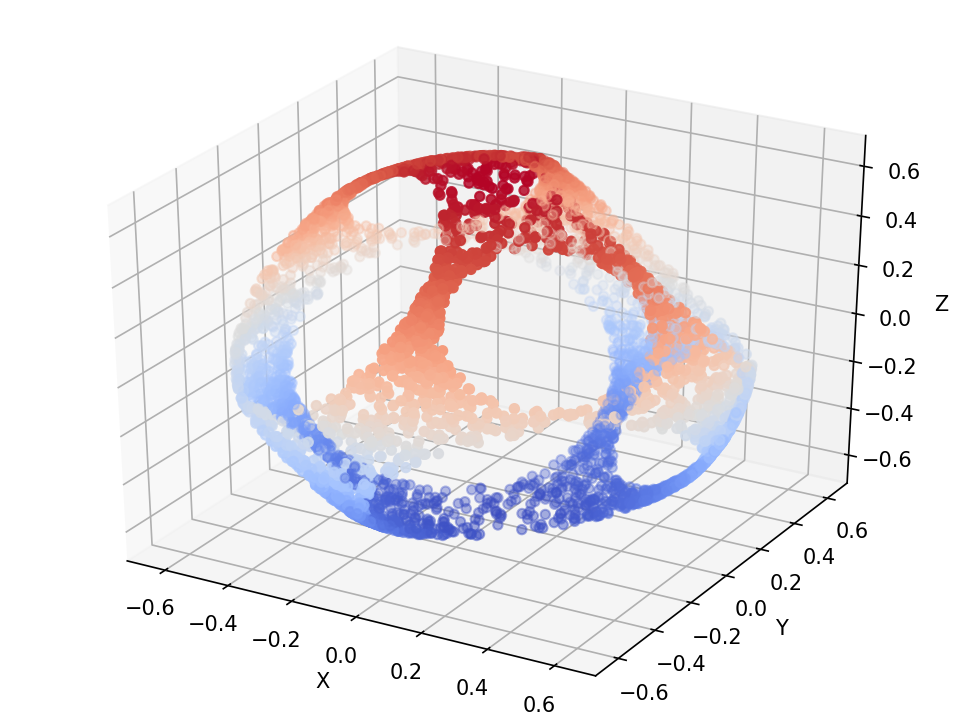

In [52]:
plotPresiceSphere(5000,0.45,0.4,[0,1])

<IPython.core.display.Javascript object>


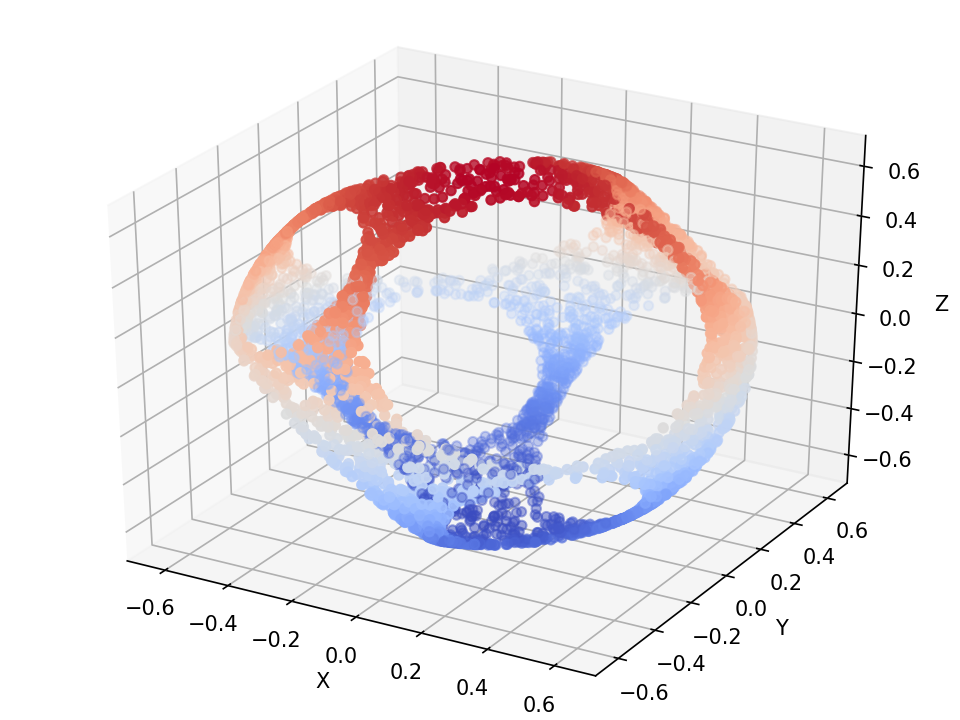

In [53]:
plotPresiceSphere(5000,0.55,0.4,[0,1])

<IPython.core.display.Javascript object>


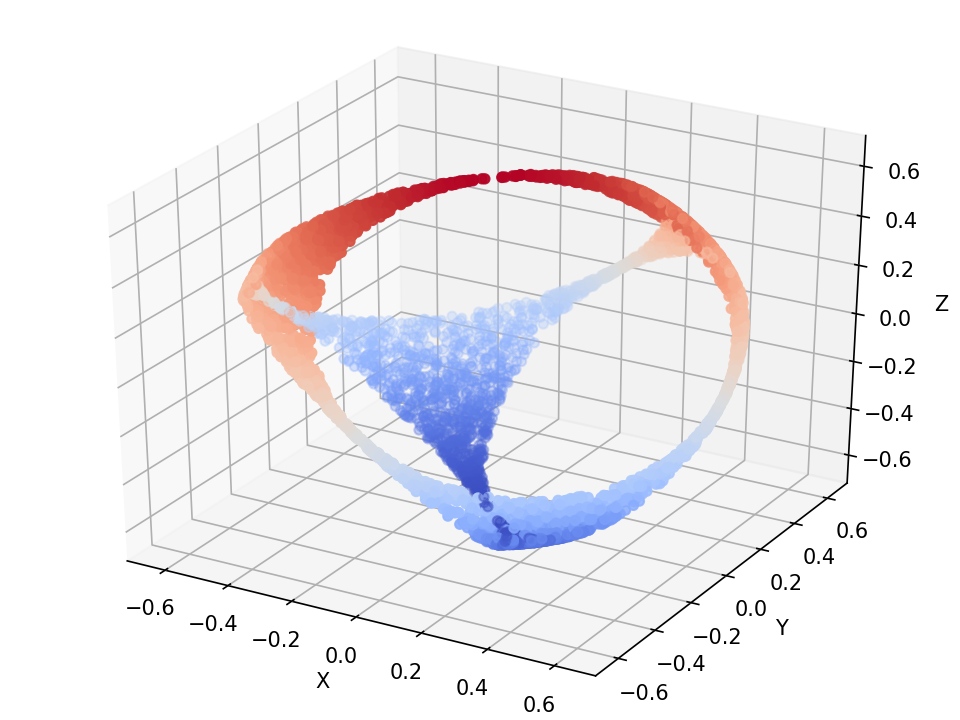

In [54]:
plotPresiceSphere(5000,0.65,0.4,[0,1])

<IPython.core.display.Javascript object>


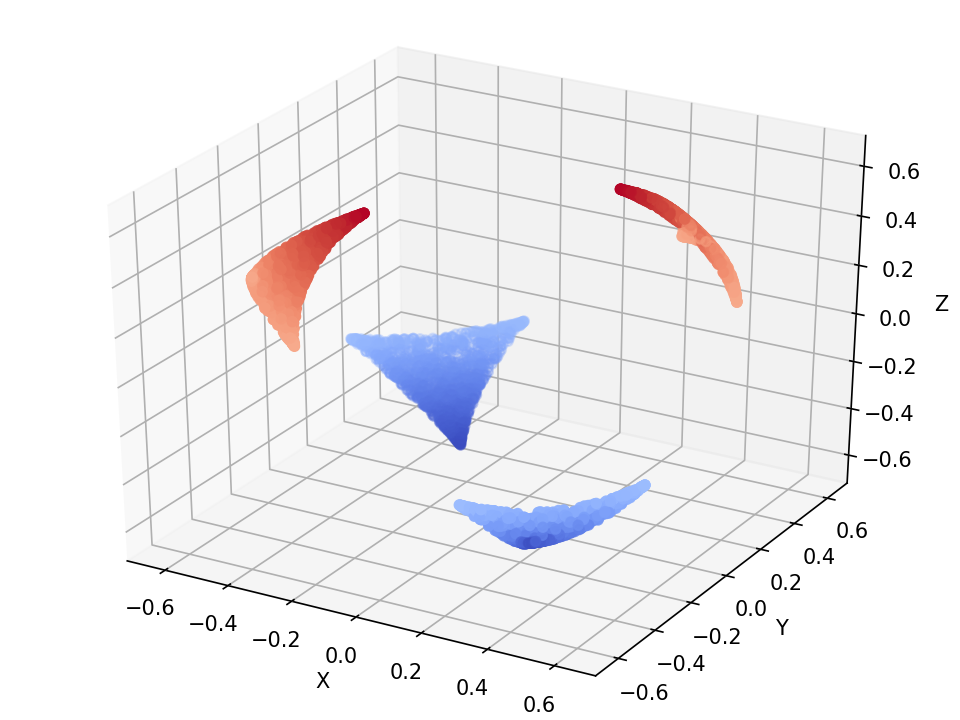

In [55]:
plotPresiceSphere(5000,0.7,0.4,[0,1])

<IPython.core.display.Javascript object>


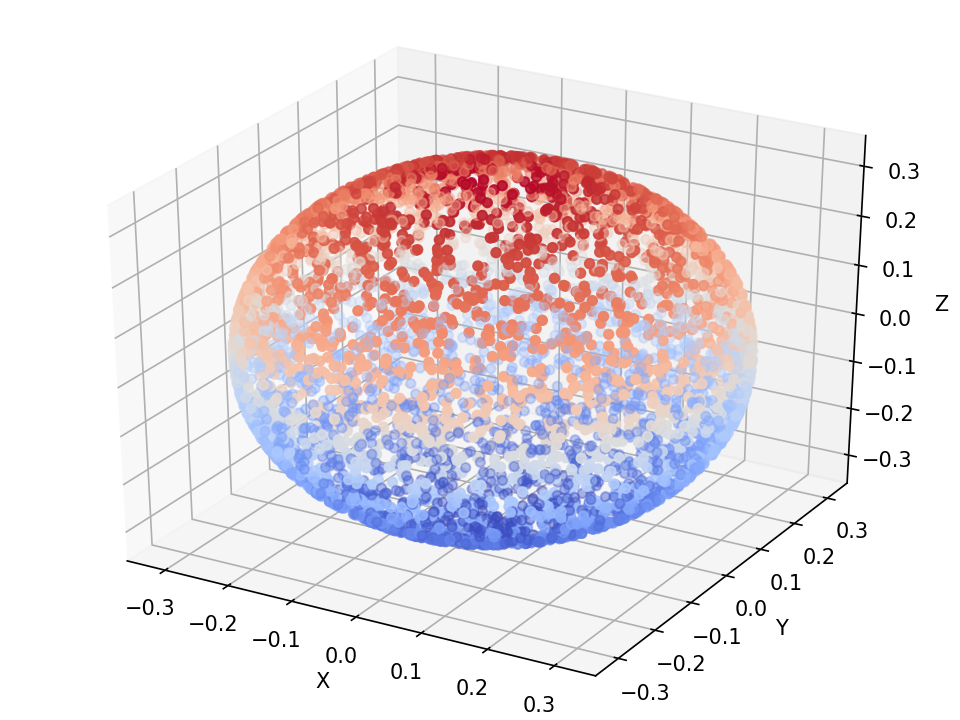

In [56]:
plotPresiceSphere(5000,0.5,0.2,[0,1])